In [ ]:
!pip install pycaret

In [ ]:
!apt-get -y install fonts-ipafont-
!pip install japanize-matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package 'fonts-ipafont' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=5927aff1e9091c390bf394416676931d4b6bd0403fa891569f460acf5270a221
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import japanize_matplotlib

In [ ]:
import matplotlib.font_manager as fm

# 利用可能なフォントを表示
for font in fm.fontManager.ttflist:
    if 'IPA' in font.name:  # IPAフォントを検索
        print(font.name, font.fname)

IPAexGothic /usr/local/lib/python3.10/dist-packages/japanize_matplotlib/fonts/ipaexg.ttf


# すべての結合したtrainデータを読みこむ

In [ ]:
train_df = pd.read_csv('/content/train_df.csv')

test_df = pd.read_csv('/content/test.csv')

In [ ]:
pd.set_option('display.max_columns', None)

## y_data plofilimgにて全体像の把握

In [ ]:
!pip install ydata_profiling
!pip install japanize_matplotlib

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e7a5e38616e3d19fada7d2c5efb5d5e4dcc77b1b1ade666fa0e14480c566f540
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# 日本語フォントのインストール
!apt-get -y install fonts-ipafont-gothic
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (9,444 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 123624 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [ ]:
import japanize_matplotlib
japanize_matplotlib.japanize()
from ydata_profiling import ProfileReport

profile = ProfileReport(train_df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### データの前処理

In [ ]:
# データのない列を削除
train_df.drop(['地域',
               '土地の形状',
               '間口',
               '延床面積（㎡）',
               '前面道路：方位',
               '前面道路：種類',
               '前面道路：幅員（ｍ）',], axis=1, inplace=True)

# testデータも同様に削除する。
test_df.drop(['地域',
               '土地の形状',
               '間口',
               '延床面積（㎡）',
               '前面道路：方位',
               '前面道路：種類',
               '前面道路：幅員（ｍ）',], axis=1, inplace=True)

In [ ]:
# 必要のないID列を削除
train_df.drop(['種類'], axis=1, inplace=True)

test_df.drop(['種類'], axis=1, inplace=True)

# 地区名の列を削除
train_df.drop(['地区名'], axis=1, inplace=True)

test_df.drop(['地区名'], axis=1, inplace=True)

In [ ]:
train_df.head()

ID  市区町村コード 都道府県名 市区町村名 最寄駅：名称 最寄駅：距離（分）   間取り 面積（㎡）    建築年 建物の構造  用途  \
0  5010526     5201   秋田県   秋田市     秋田        16    １Ｒ    25  1990年    ＲＣ  住宅   
1  5003861     5201   秋田県   秋田市     秋田   30分～60分    １Ｋ    30  1990年    ＲＣ  住宅   
2  5000993     5201   秋田県   秋田市     秋田        19  ４ＬＤＫ    90  1998年   ＳＲＣ  住宅   
3  5011573     5201   秋田県   秋田市     秋田        18    １Ｋ    15  1988年   ＳＲＣ  住宅   
4  5011246     5201   秋田県   秋田市     秋田   30分～60分   １ＤＫ    25  1991年   ＳＲＣ  住宅   

  今後の利用目的  都市計画  建ぺい率（％）  容積率（％）        取引時点    改装 取引の事情等  取引価格（総額）_log  
0     NaN  １種住居     60.0   200.0  2011年第3四半期   未改装    NaN      6.278754  
1     その他  １種住居     60.0   200.0  2023年第2四半期   未改装    NaN      6.477121  
2      住宅    商業     80.0   400.0  2020年第3四半期   未改装    NaN      7.146128  
3     NaN    商業     80.0   400.0  2013年第3四半期   未改装    NaN      5.812913  
4     NaN    商業     80.0   400.0  2013年第4四半期  改装済み    NaN      6.556303

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789720 entries, 0 to 789719
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            789720 non-null  int64  
 1   市区町村コード       789720 non-null  int64  
 2   都道府県名         789720 non-null  object 
 3   市区町村名         789720 non-null  object 
 4   最寄駅：名称        787819 non-null  object 
 5   最寄駅：距離（分）     768129 non-null  object 
 6   間取り           757904 non-null  object 
 7   面積（㎡）         789720 non-null  object 
 8   建築年           766378 non-null  object 
 9   建物の構造         765374 non-null  object 
 10  用途            696477 non-null  object 
 11  今後の利用目的       444816 non-null  object 
 12  都市計画          768946 non-null  object 
 13  建ぺい率（％）       764608 non-null  float64
 14  容積率（％）        764608 non-null  float64
 15  取引時点          789720 non-null  object 
 16  改装            706904 non-null  object 
 17  取引の事情等        17823 non-null   object 
 18  取引価格

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19390 entries, 0 to 19389
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         19390 non-null  int64  
 1   市区町村コード    19390 non-null  int64  
 2   都道府県名      19390 non-null  object 
 3   市区町村名      19390 non-null  object 
 4   最寄駅：名称     19370 non-null  object 
 5   最寄駅：距離（分）  19370 non-null  object 
 6   間取り        18184 non-null  object 
 7   面積（㎡）      19390 non-null  int64  
 8   建築年        18854 non-null  object 
 9   建物の構造      18499 non-null  object 
 10  用途         15162 non-null  object 
 11  今後の利用目的    18595 non-null  object 
 12  都市計画       19124 non-null  object 
 13  建ぺい率（％）    19042 non-null  float64
 14  容積率（％）     19042 non-null  float64
 15  取引時点       19390 non-null  object 
 16  改装         16134 non-null  object 
 17  取引の事情等     168 non-null    object 
dtypes: float64(2), int64(3), object(13)
memory usage: 2.7+ MB


### 欠損値を補完

In [ ]:
# 最寄駅：名称の欠損を市区町村コードから予測して補完する

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 欠損値がないデータのみ抽出
train_data = train_df.dropna(subset=['最寄駅：名称'])

# 説明変数と目的変数
X = train_data[['市区町村コード']]
y = train_data['最寄駅：名称']

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 決定木モデルを作成
model = DecisionTreeClassifier(random_state=42)

# モデルを学習
model.fit(X_train, y_train)

# 欠損値を予測
missing_data = train_df[train_df['最寄駅：名称'].isnull()]
predicted_stations = model.predict(missing_data[['市区町村コード']])

# 欠損値を補完
train_df.loc[train_df['最寄駅：名称'].isnull(), '最寄駅：名称'] = predicted_stations

In [ ]:
# テストデータも同様に補完
# 欠損値がないデータのみ抽出
train_data = test_df.dropna(subset=['最寄駅：名称'])

# 説明変数と目的変数
X = train_data[['市区町村コード']]
y = train_data['最寄駅：名称']

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 決定木モデルを作成
model = DecisionTreeClassifier(random_state=42)

# モデルを学習
model.fit(X_train, y_train)

# 欠損値を予測
missing_data = test_df[test_df['最寄駅：名称'].isnull()]
predicted_stations = model.predict(missing_data[['市区町村コード']])

# 欠損値を補完
test_df.loc[test_df['最寄駅：名称'].isnull(), '最寄駅：名称'] = predicted_stations

最寄駅：距離（分）のオブジェクト型をint型に変更するために、データを置換

In [ ]:
# データ例
data = {'最寄駅：距離（分）': ['30分～60分', '1H～1H30', '1H30～2H', '2H～', '5分', '10分']}
df = pd.DataFrame(data)

# 置き換えルールを辞書で定義
replace_dict = {
    '30分～60分': 30,
    '1H～1H30': 60,
    '1H30～2H': 90,
    '2H～': 120,
}

# applyメソッドとラムダ式で書き換え
train_df['最寄駅：距離（分）'] = train_df['最寄駅：距離（分）'].apply(lambda x: replace_dict.get(x, x))

# カラムのデータ型を浮動小数点型に変更 (欠損値がある場合)
train_df['最寄駅：距離（分）'] = train_df['最寄駅：距離（分）'].astype(float)


# testデータも同様に置換
test_df['最寄駅：距離（分）'] = test_df['最寄駅：距離（分）'].apply(lambda x: replace_dict.get(x, x))
# カラムのデータ型を浮動小数点型に変更 (欠損値がある場合)
test_df['最寄駅：距離（分）'] = test_df['最寄駅：距離（分）'].astype(float)

In [ ]:
# 市区町村コード別に最寄駅までの平均距離を計算
average_distances = train_df.groupby('市区町村コード')['最寄駅：距離（分）'].mean()

# 全体の平均距離を計算
overall_average_distance = train_df['最寄駅：距離（分）'].mean()

# 平均距離が計算できなかった市区町村コードに対しては、全体の平均距離で補完する
average_distances = average_distances.fillna(overall_average_distance)

# 欠損値を平均距離で補完
train_df['最寄駅：距離（分）'] = train_df['最寄駅：距離（分）'].fillna(train_df['市区町村コード'].map(average_distances))

In [ ]:
# テストデータも同様に補完する
# 最寄駅：距離（分）の欠損を市区町村コードから、その地域の平均的な駅距離を算出し、欠損値を補完する
# 市区町村コード別に最寄駅までの平均距離を計算
average_distances = test_df.groupby('市区町村コード')['最寄駅：距離（分）'].mean()

# 全体の平均距離を計算
overall_average_distance = test_df['最寄駅：距離（分）'].mean()

# 平均距離が計算できなかった市区町村コードに対しては、全体の平均距離で補完する
average_distances = average_distances.fillna(overall_average_distance)

# 欠損値を平均距離で補完
test_df['最寄駅：距離（分）'] = test_df['最寄駅：距離（分）'].fillna(test_df['市区町村コード'].map(average_distances))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789720 entries, 0 to 789719
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            789720 non-null  int64  
 1   市区町村コード       789720 non-null  int64  
 2   都道府県名         789720 non-null  object 
 3   市区町村名         789720 non-null  object 
 4   最寄駅：名称        789720 non-null  object 
 5   最寄駅：距離（分）     789720 non-null  float64
 6   間取り           757904 non-null  object 
 7   面積（㎡）         789720 non-null  object 
 8   建築年           766378 non-null  object 
 9   建物の構造         765374 non-null  object 
 10  用途            696477 non-null  object 
 11  今後の利用目的       444816 non-null  object 
 12  都市計画          768946 non-null  object 
 13  建ぺい率（％）       764608 non-null  float64
 14  容積率（％）        764608 non-null  float64
 15  取引時点          789720 non-null  object 
 16  改装            706904 non-null  object 
 17  取引の事情等        17823 non-null   object 
 18  取引価格

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# '建築年' 列から年を抽出し、数値に変換する
train_df['建築年'] = pd.to_numeric(train_df['建築年'].str.extract('(\d+)')[0], errors='coerce')

# 欠損値がないデータでモデルを学習
train_data = train_df.dropna(subset=['建築年'])
X_train = train_data[['市区町村コード', '最寄駅：距離（分）']]
y_train = train_data['建築年']
model = LinearRegression()
model.fit(X_train, y_train)

# 欠損値を予測
missing_data = train_df[train_df['建築年'].isnull()]
X_missing = missing_data[['市区町村コード', '最寄駅：距離（分）']]

# Imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and validation data
X_missing = imputer.fit_transform(X_missing)

predicted_year = model.predict(X_missing)

# 欠損値を補完
train_df.loc[train_df['建築年'].isnull(), '建築年'] = predicted_year.astype(int)

In [ ]:
# test_dfにも同様の処理を行う
# '建築年' 列から年を抽出し、数値に変換する
test_df['建築年'] = pd.to_numeric(test_df['建築年'].str.extract('(\d+)')[0], errors='coerce')

# 欠損値がないデータでモデルを学習
train_data = test_df.dropna(subset=['建築年'])
X_train = train_data[['市区町村コード', '最寄駅：距離（分）']]
y_train = train_data['建築年']
model = LinearRegression()
model.fit(X_train, y_train)

# 欠損値を予測
missing_data_test = test_df[test_df['建築年'].isnull()]
X_missing_test = missing_data_test[['市区町村コード', '最寄駅：距離（分）']]

# Imputer to replace NaN values with the mean of the column
X_missing_test = imputer.transform(X_missing_test)  # train_dfでfitしたimputerを使用

predicted_year_test = model.predict(X_missing_test)  # train_dfで学習したmodelを使用

# 欠損値を補完
test_df.loc[test_df['建築年'].isnull(), '建築年'] = predicted_year_test.astype(int)

In [ ]:
# 現在の年を取得
import datetime
current_year = datetime.datetime.now().year

# 築年数を計算
train_df['築年数'] = current_year - train_df['建築年'].astype(int)

# 面積を数値に変換
train_df['面積（㎡）'] = train_df['面積（㎡）'].str.replace(',', '', regex=True).str.replace('㎡以上', '', regex=True)  # 「,」と「㎡以上」を削除
train_df['面積（㎡）'] = pd.to_numeric(train_df['面積（㎡）'], errors='coerce')  # 数値に変換

# テストデータも同様に変換
# 築年数を計算
test_df['築年数'] = current_year - train_df['建築年'].astype(int)

In [ ]:
train_df = train_df.drop(['建築年'], axis=1)

test_df = test_df.drop(['建築年'], axis=1)

In [ ]:
# 面積を手がかりに、欠損している間取りを予測する
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 欠損値がないデータのみ抽出
train_data = train_df.dropna(subset=['間取り'])

# 説明変数と目的変数
X = train_data[['面積（㎡）']]  # 面積を説明変数として使用
y = train_data['間取り']

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 決定木モデルを作成
model = DecisionTreeClassifier(random_state=42)

# モデルを学習
model.fit(X_train, y_train)

# 欠損値を予測
missing_data = train_df[train_df['間取り'].isnull()]
predicted_layouts = model.predict(missing_data[['面積（㎡）']])

# 欠損値を補完
train_df.loc[train_df['間取り'].isnull(), '間取り'] = predicted_layouts


In [ ]:
# 間取りごとの面積の平均値を計算
average_area_by_layout = train_df.groupby('間取り')['面積（㎡）'].mean()

# 欠損値を間取りごとの平均値で補完
# fillnaで元の値を維持
train_df['面積（㎡）'] = train_df['間取り'].map(average_area_by_layout).fillna(train_df['面積（㎡）'])

In [ ]:
# train_dfの面積（㎡）カラムの平均値を計算
average_area = train_df['面積（㎡）'].mean()

# train_dfの面積（㎡）カラムの欠損値を平均値で補完
train_df['面積（㎡）'] = train_df['面積（㎡）'].fillna(average_area)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789720 entries, 0 to 789719
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            789720 non-null  int64  
 1   市区町村コード       789720 non-null  int64  
 2   都道府県名         789720 non-null  object 
 3   市区町村名         789720 non-null  object 
 4   最寄駅：名称        789720 non-null  object 
 5   最寄駅：距離（分）     789720 non-null  float64
 6   間取り           789720 non-null  object 
 7   面積（㎡）         789720 non-null  float64
 8   建物の構造         765374 non-null  object 
 9   用途            696477 non-null  object 
 10  今後の利用目的       444816 non-null  object 
 11  都市計画          768946 non-null  object 
 12  建ぺい率（％）       764608 non-null  float64
 13  容積率（％）        764608 non-null  float64
 14  取引時点          789720 non-null  object 
 15  改装            706904 non-null  object 
 16  取引の事情等        17823 non-null   object 
 17  取引価格（総額）_log  789720 non-null  float64
 18  築年数 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19390 entries, 0 to 19389
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         19390 non-null  int64  
 1   市区町村コード    19390 non-null  int64  
 2   都道府県名      19390 non-null  object 
 3   市区町村名      19390 non-null  object 
 4   最寄駅：名称     19390 non-null  object 
 5   最寄駅：距離（分）  19390 non-null  float64
 6   間取り        18184 non-null  object 
 7   面積（㎡）      19390 non-null  int64  
 8   建物の構造      18499 non-null  object 
 9   用途         15162 non-null  object 
 10  今後の利用目的    18595 non-null  object 
 11  都市計画       19124 non-null  object 
 12  建ぺい率（％）    19042 non-null  float64
 13  容積率（％）     19042 non-null  float64
 14  取引時点       19390 non-null  object 
 15  改装         16134 non-null  object 
 16  取引の事情等     168 non-null    object 
 17  築年数        19390 non-null  int64  
dtypes: float64(3), int64(4), object(11)
memory usage: 2.7+ MB


In [ ]:
# 間取りのグルーピング
def group_layout(layout):
    if layout in ['1R', '1K', '1DK']:
        return 'ワンルーム系'
    elif layout in ['1LDK', '1LDK+S']:
        return '1LDK系'
    elif layout in ['2LDK', '2LDK+S']:
        return '2LDK系'
    elif layout in ['3LDK', '3LDK+S']:
        return '3LDK系'
    else:
        return '4LDK以上'

train_df['間取り_グループ'] = train_df['間取り'].apply(group_layout)

# ワンホットエンコーディング
train_df = pd.get_dummies(train_df, columns=['間取り_グループ'], prefix=['間取り'])

In [ ]:
test_df['間取り_グループ'] = test_df['間取り'].apply(group_layout)

# ワンホットエンコーディング
test_df = pd.get_dummies(test_df, columns=['間取り_グループ'], prefix=['間取り'])

In [ ]:
train_df.head()

ID  市区町村コード 都道府県名 市区町村名 最寄駅：名称  最寄駅：距離（分）   間取り      面積（㎡） 建物の構造  用途  \
0  5010526     5201   秋田県   秋田市     秋田       16.0    １Ｒ  19.868837    ＲＣ  住宅   
1  5003861     5201   秋田県   秋田市     秋田       30.0    １Ｋ  20.735070    ＲＣ  住宅   
2  5000993     5201   秋田県   秋田市     秋田       19.0  ４ＬＤＫ  86.493585   ＳＲＣ  住宅   
3  5011573     5201   秋田県   秋田市     秋田       18.0    １Ｋ  20.735070   ＳＲＣ  住宅   
4  5011246     5201   秋田県   秋田市     秋田       30.0   １ＤＫ  30.174163   ＳＲＣ  住宅   

  今後の利用目的  都市計画  建ぺい率（％）  容積率（％）        取引時点    改装 取引の事情等  取引価格（総額）_log  築年数  \
0     NaN  １種住居     60.0   200.0  2011年第3四半期   未改装    NaN      6.278754   34   
1     その他  １種住居     60.0   200.0  2023年第2四半期   未改装    NaN      6.477121   34   
2      住宅    商業     80.0   400.0  2020年第3四半期   未改装    NaN      7.146128   26   
3     NaN    商業     80.0   400.0  2013年第3四半期   未改装    NaN      5.812913   36   
4     NaN    商業     80.0   400.0  2013年第4四半期  改装済み    NaN      6.556303   33   

   間取り_4LDK以上  
0        True  
1        True  
2        True  
3        True  
4        True

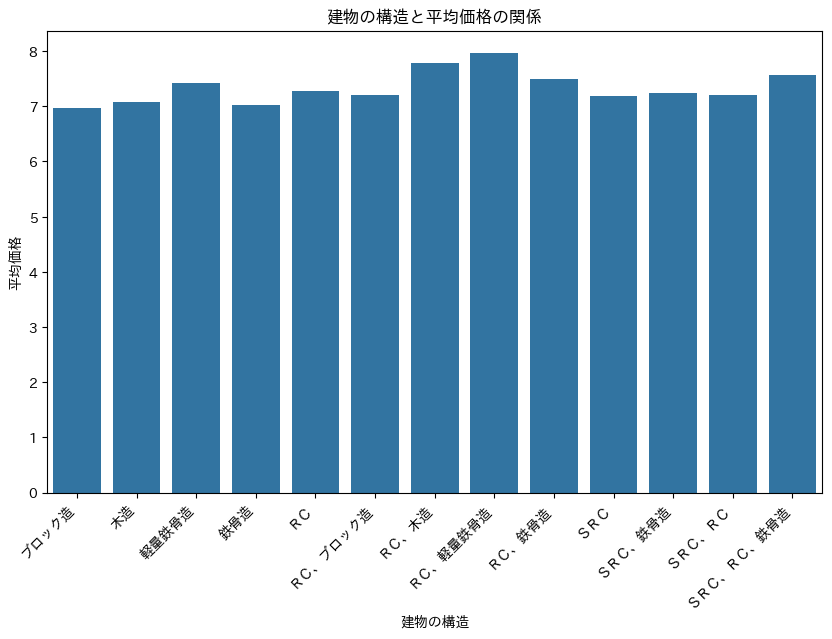

In [ ]:
# 建物の構造ごとの平均価格を算出
structure_prices = train_df.groupby('建物の構造')['取引価格（総額）_log'].mean()

# 棒グラフで可視化
plt.figure(figsize=(10, 6))
sns.barplot(x=structure_prices.index, y=structure_prices.values)
plt.title('建物の構造と平均価格の関係')
plt.xlabel('建物の構造')
plt.ylabel('平均価格')
japanize_matplotlib.japanize()  # 日本語フォントを設定
plt.xticks(rotation=45, ha='right')  # X軸ラベルを回転
plt.show()

In [ ]:
# 建物の構造ごとの取引価格の平均値を計算
structure_prices = train_df.groupby('建物の構造')['取引価格（総額）_log'].mean()

# 建物の構造をターゲットエンコーディング
train_df['建物の構造_encoded'] = train_df['建物の構造'].map(structure_prices)

# 元の建物の構造カラムを削除
train_df = train_df.drop('建物の構造', axis=1)

# test_dfにも同様の処理を行う
test_df['建物の構造_encoded'] = test_df['建物の構造'].map(structure_prices)

# 元の建物の構造カラムを削除
test_df = test_df.drop('建物の構造', axis=1)

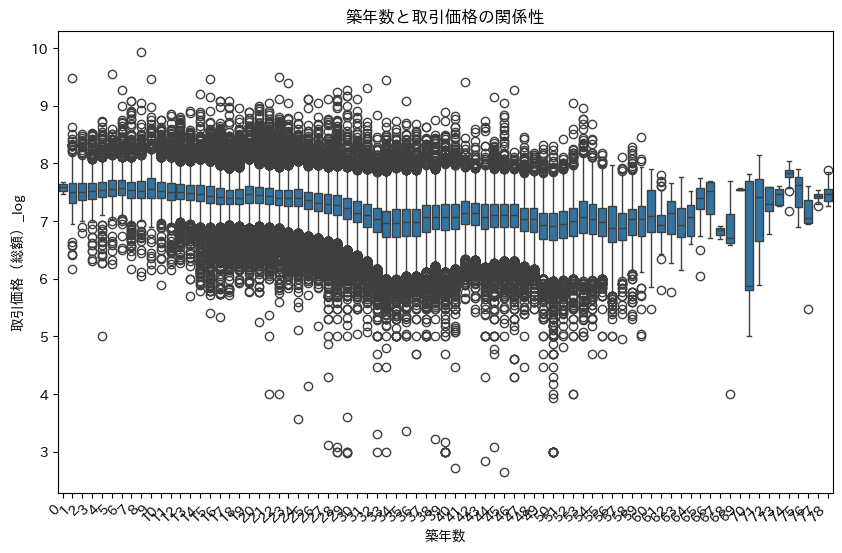

In [ ]:
# 箱ひげ図を作成
plt.figure(figsize=(10, 6))
sns.boxplot(x='築年数', y='取引価格（総額）_log', data=train_df)
plt.xlabel('築年数')
plt.ylabel('取引価格（総額）_log')
plt.title('築年数と取引価格の関係性')
plt.xticks(rotation=45, ha='right')  # x軸のラベルを回転
japanize_matplotlib.japanize()
plt.show()

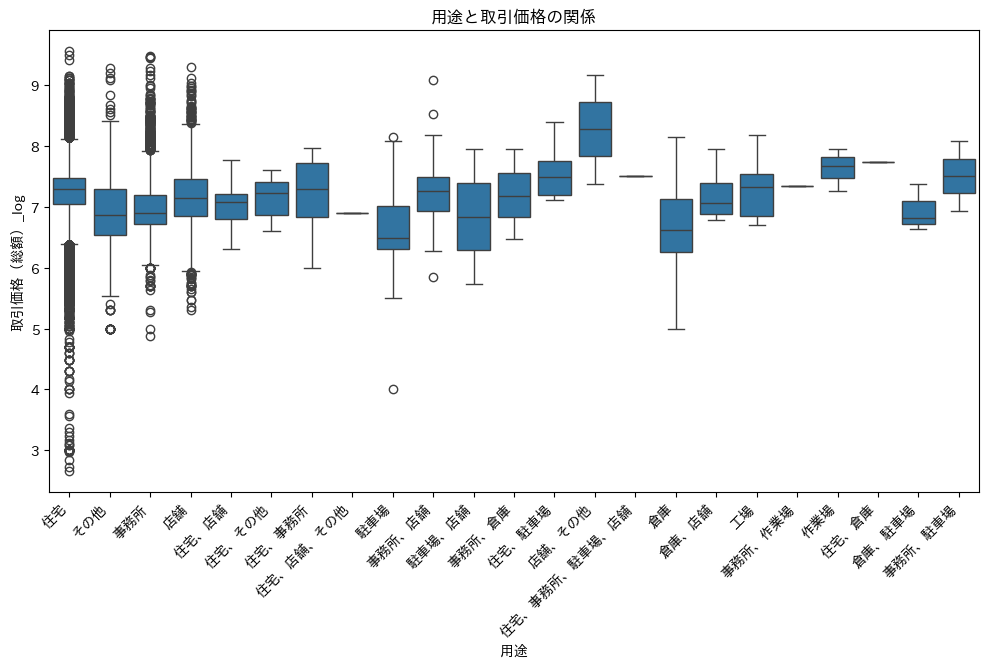

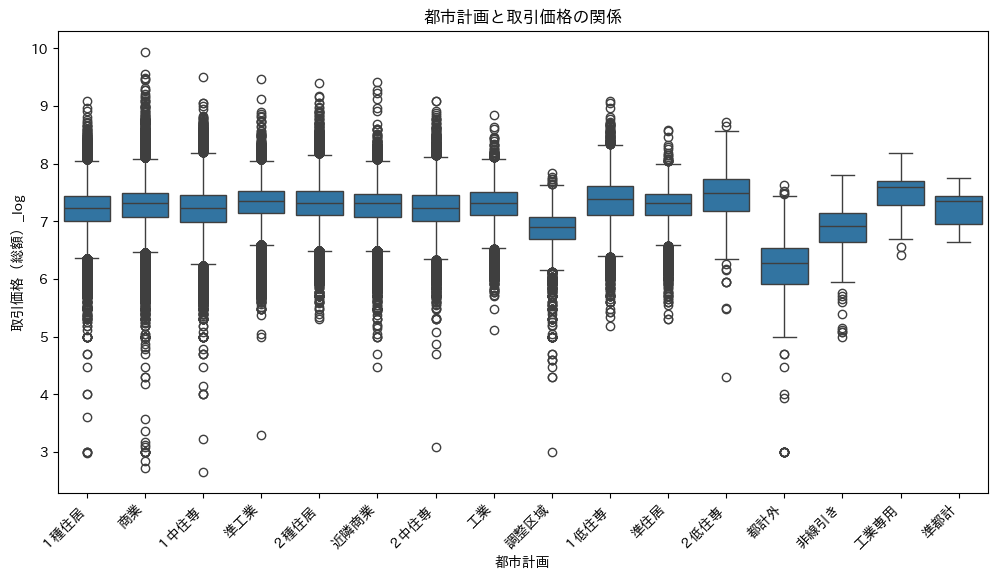

In [ ]:
# 用途と取引価格の関係
plt.figure(figsize=(12, 6))
sns.boxplot(x='用途', y='取引価格（総額）_log', data=train_df)
plt.title('用途と取引価格の関係')
plt.xticks(rotation=45, ha='right')  # x軸ラベルを回転
japanize_matplotlib.japanize()  # matplotlibで日本語を表示するために必要
plt.show()

# 都市計画と取引価格の関係
plt.figure(figsize=(12, 6))
sns.boxplot(x='都市計画', y='取引価格（総額）_log', data=train_df)
plt.title('都市計画と取引価格の関係')
plt.xticks(rotation=45, ha='right')  # x軸ラベルを回転
japanize_matplotlib.japanize()
plt.show()

In [ ]:
train_df = train_df.drop(['用途','都市計画'], axis=1)

test_df = test_df.drop(['用途','都市計画'], axis=1)

In [ ]:
# 年と四半期を抽出
train_df['取引年'] = pd.to_numeric(train_df['取引時点'].str.extract(r'(\d+)')[0], errors='coerce').astype('Int64')  # 年を抽出
train_df['取引四半期'] = pd.to_numeric(train_df['取引時点'].str.extract(r'第(\d)四半期')[0], errors='coerce').astype('Int64')  # 四半期を抽出

# 取引四半期を数値に変換
quarter_mapping = {1: 3, 2: 6, 3: 9, 4: 12}
train_df['取引四半期'] = train_df['取引四半期'].replace(quarter_mapping)

# testデータも同様に変換
test_df['取引年'] = pd.to_numeric(test_df['取引時点'].str.extract(r'(\d+)')[0], errors='coerce').astype('Int64')
test_df['取引四半期'] = pd.to_numeric(test_df['取引時点'].str.extract(r'第(\d)四半期')[0], errors='coerce').astype('Int64')

test_df['取引四半期'] = test_df['取引四半期'].replace(quarter_mapping)

In [ ]:
# 取引時点の列を削除
train_df = train_df.drop(['取引時点'], axis=1)

# testデータも同様に削除
test_df = test_df.drop(['取引時点'], axis=1)

In [ ]:
# 改装をワンホットエンコーディングする
train_df = pd.get_dummies(train_df, columns=['改装'], prefix=['改装'])

# testデータも同様に削除
test_df = pd.get_dummies(test_df, columns=['改装'], prefix=['改装'])

In [ ]:
# 最寄駅：名称のカウント数が1000以上のデータを主要駅リストとして、主要駅フラグを作成
# 主要駅リストの作成
major_stations = train_df['最寄駅：名称'].value_counts()[train_df['最寄駅：名称'].value_counts() >= 500].index.tolist()

# 主要駅フラグの作成
train_df['主要駅フラグ'] = train_df['最寄駅：名称'].apply(lambda x: 1 if x in major_stations else 0)

# testデータも同様に変換
major_stations = test_df['最寄駅：名称'].value_counts()[test_df['最寄駅：名称'].value_counts() >= 1000].index.tolist()

test_df['主要駅フラグ'] = test_df['最寄駅：名称'].apply(lambda x: 1 if x in major_stations else 0)

In [ ]:
train_df = train_df.drop(['最寄駅：名称'], axis=1)

test_df = test_df.drop(['最寄駅：名称'], axis=1)

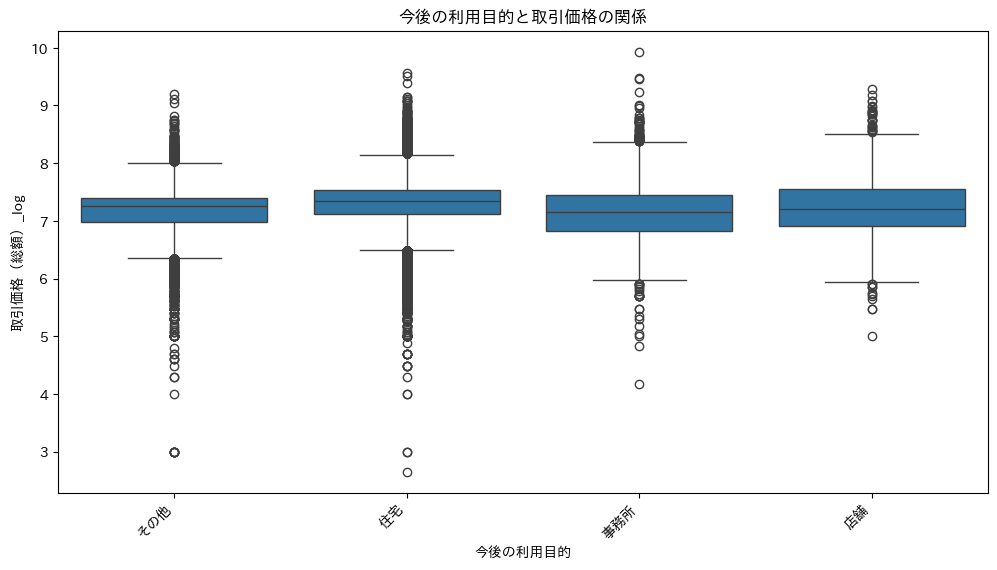

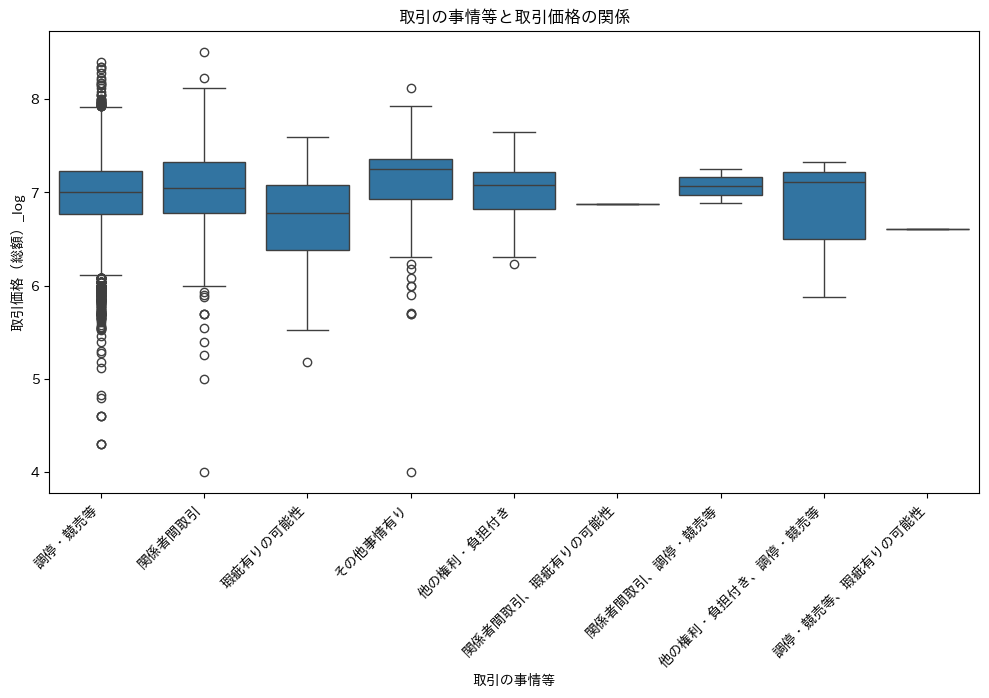

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='今後の利用目的', y='取引価格（総額）_log', data=train_df)
plt.title('今後の利用目的と取引価格の関係')
plt.xticks(rotation=45, ha='right')  # x軸ラベルを回転
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='取引の事情等', y='取引価格（総額）_log', data=train_df)
plt.title('取引の事情等と取引価格の関係')
plt.xticks(rotation=45, ha='right')  # x軸ラベルを回転
plt.show()

In [ ]:
train_df = train_df.drop(['今後の利用目的'], axis=1)
train_df = train_df.drop(['取引の事情等'], axis=1)

test_df = test_df.drop(['今後の利用目的'], axis=1)
test_df = test_df.drop(['取引の事情等'], axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789720 entries, 0 to 789719
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             789720 non-null  int64  
 1   市区町村コード        789720 non-null  int64  
 2   都道府県名          789720 non-null  object 
 3   市区町村名          789720 non-null  object 
 4   最寄駅：距離（分）      789720 non-null  float64
 5   間取り            789720 non-null  object 
 6   面積（㎡）          789720 non-null  float64
 7   建ぺい率（％）        764608 non-null  float64
 8   容積率（％）         764608 non-null  float64
 9   取引価格（総額）_log   789720 non-null  float64
 10  築年数            789720 non-null  int64  
 11  間取り_4LDK以上     789720 non-null  bool   
 12  建物の構造_encoded  765374 non-null  float64
 13  取引年            789720 non-null  Int64  
 14  取引四半期          789720 non-null  Int64  
 15  改装_改装済み        789720 non-null  bool   
 16  改装_未改装         789720 non-null  bool   
 17  主要駅フラグ         789720 non-nul

## train_dataが847,189行となり、精度評価するテストデータはRangeIndex: 19390となっている。データ数を合わせる必要があるため、ランダム化層化抽出を行う。

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# 新たな層化カラムを作成
train_df['都道府県_市区町村'] = train_df['都道府県名'] + '_' + train_df['市区町村名']

# 層化カラムの値の出現回数をカウント
class_counts = train_df['都道府県_市区町村'].value_counts()

# 出現回数が1回だけの値を持つ行を削除
# (または、これらの行を別の方法で処理する)
train_df = train_df[train_df['都道府県_市区町村'].isin(class_counts[class_counts > 1].index)]

# train_dfのインデックスをリセットする:
train_df = train_df.reset_index(drop=True)  # 行削除後にインデックスをリセット

# 層化抽出のための分割器を作成
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

# trainデータから層化抽出
for train_index, _ in sss.split(train_df, train_df['都道府県_市区町村']):
    # .ilocを使用して整数位置で行にアクセスする:
    train_subset = train_df.iloc[train_index]

In [ ]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473824 entries, 620693 to 547065
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             473824 non-null  int64  
 1   市区町村コード        473824 non-null  int64  
 2   都道府県名          473824 non-null  object 
 3   市区町村名          473824 non-null  object 
 4   最寄駅：距離（分）      473824 non-null  float64
 5   間取り            473824 non-null  object 
 6   面積（㎡）          473824 non-null  float64
 7   建ぺい率（％）        458808 non-null  float64
 8   容積率（％）         458808 non-null  float64
 9   取引価格（総額）_log   473824 non-null  float64
 10  築年数            473824 non-null  int64  
 11  間取り_4LDK以上     473824 non-null  bool   
 12  建物の構造_encoded  459271 non-null  float64
 13  取引年            473824 non-null  Int64  
 14  取引四半期          473824 non-null  Int64  
 15  改装_改装済み        473824 non-null  bool   
 16  改装_未改装         473824 non-null  bool   
 17  主要駅フラグ         473824 non-nul

In [ ]:
train_subset = train_subset.drop(['都道府県名','市区町村名'], axis=1)

test_df = test_df.drop(['都道府県名','市区町村名'], axis=1)

In [ ]:
train_subset = train_subset.drop(['都道府県_市区町村'], axis=1)

In [ ]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473824 entries, 620693 to 547065
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             473824 non-null  int64  
 1   市区町村コード        473824 non-null  int64  
 2   最寄駅：距離（分）      473824 non-null  float64
 3   間取り            473824 non-null  object 
 4   面積（㎡）          473824 non-null  float64
 5   建ぺい率（％）        458808 non-null  float64
 6   容積率（％）         458808 non-null  float64
 7   取引価格（総額）_log   473824 non-null  float64
 8   築年数            473824 non-null  int64  
 9   間取り_4LDK以上     473824 non-null  bool   
 10  建物の構造_encoded  459271 non-null  float64
 11  取引年            473824 non-null  Int64  
 12  取引四半期          473824 non-null  Int64  
 13  改装_改装済み        473824 non-null  bool   
 14  改装_未改装         473824 non-null  bool   
 15  主要駅フラグ         473824 non-null  int64  
dtypes: Int64(2), bool(3), float64(6), int64(4), object(1)
memory usage: 52.9+ 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19390 entries, 0 to 19389
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             19390 non-null  int64  
 1   市区町村コード        19390 non-null  int64  
 2   最寄駅：距離（分）      19390 non-null  float64
 3   間取り            18184 non-null  object 
 4   面積（㎡）          19390 non-null  int64  
 5   建ぺい率（％）        19042 non-null  float64
 6   容積率（％）         19042 non-null  float64
 7   築年数            19390 non-null  int64  
 8   間取り_4LDK以上     19390 non-null  bool   
 9   建物の構造_encoded  18499 non-null  float64
 10  取引年            19390 non-null  Int64  
 11  取引四半期          19390 non-null  Int64  
 12  改装_改装済み        19390 non-null  bool   
 13  改装_未改装         19390 non-null  bool   
 14  主要駅フラグ         19390 non-null  int64  
dtypes: Int64(2), bool(3), float64(4), int64(5), object(1)
memory usage: 1.9+ MB


In [ ]:
train_subset.head()

ID  市区町村コード  最寄駅：距離（分）   間取り      面積（㎡）  建ぺい率（％）  容積率（％）  \
620693  13080459    13107        7.0    １Ｋ  20.735070     60.0   300.0   
343888  14206462    14136       29.0   ２ＤＫ  46.953344     60.0   200.0   
412252  14170686    14131        3.0  ３ＬＤＫ  70.230912     60.0   300.0   
104450  27134162    27145       30.0  ３ＬＤＫ  70.230912     60.0   200.0   
141677  27173744    27205       28.0  ３ＬＤＫ  70.230912     60.0   200.0   

        取引価格（総額）_log  築年数  間取り_4LDK以上  建物の構造_encoded   取引年  取引四半期  改装_改装済み  \
620693      7.322219   17        True       7.275921  2020      6    False   
343888      6.397940   49        True       7.275921  2021      6    False   
412252      7.447158   36        True       7.275921  2010      6     True   
104450      6.698970   45        True       7.275921  2021     12    False   
141677      7.230449   39        True       7.275921  2010      3    False   

        改装_未改装  主要駅フラグ  
620693    True       1  
343888    True       1  
412252   False       0  
104450    True       0  
141677    True       1

In [ ]:
train_df['取引年'].value_counts()

取引年
2021    54797
2022    52002
2020    51879
2019    48134
2016    47470
2015    47454
2013    47203
2018    47121
2017    46774
2014    45374
2010    45362
2012    42110
2011    41774
2009    40504
2023    37265
2008    36431
2007    31244
2006    19838
2005     6972
Name: count, dtype: Int64

## PyCaretにてモデルの選定を行う。

2021年のデータで学習し、2022年データで検証、その結果で2023年のデータで再度検証を行う。

In [ ]:
from pycaret.regression import *

# 2021年と2022年のデータを結合して学習データを作成
train_data = pd.concat([train_subset[train_subset['取引年'] == 2021],
                           train_subset[train_subset['取引年'] == 2022]])

# 2023年のデータを検証データとして使用
val_data_2023 = train_subset[train_subset['取引年'] == 2023]

# 説明変数と目的変数を定義
X_train = train_data.drop(['取引価格（総額）_log', '取引年'], axis=1)
y_train = train_data['取引価格（総額）_log']
X_val_2023 = val_data_2023.drop(['取引価格（総額）_log', '取引年'], axis=1)
y_val_2023 = val_data_2023['取引価格（総額）_log']

# PyCaret の setup 関数でデータの前処理を行う
s = setup(data=train_data,
             target='取引価格（総額）_log',
             ignore_features=['取引年'],  # 取引年は除外
             session_id=123)  # 乱数シードを固定

# 平均絶対誤差 (MAE) を基準にモデルを比較
best_model = compare_models(sort='MAE')

# 最良のモデルを作成し、ハイパーパラメータを調整
final_model = create_model(best_model)
tuned_model = tune_model(final_model, optimize='MAE')

# 学習済みモデルで2023年の検証データを予測
predictions = predict_model(tuned_model, data=X_val_2023)

Initiated  . . . . . . . . . . . . . . . . . .               03:58:04
Status     . . . . . . . . . . . . . . . . . .       Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Extra Trees Regressor

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## permutation_importanceにて重要な特徴量を算出していく

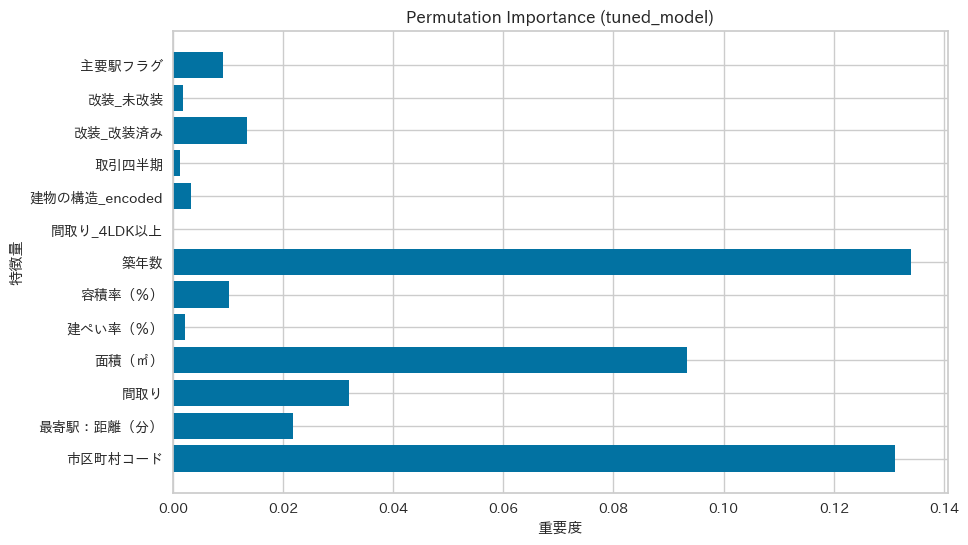

In [ ]:
from pycaret.regression import *  # PyCaret の必要なモジュールをインポート
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import japanize_matplotlib

# PyCaretでモデルを学習 (すでに実行済みと仮定)
# ... (setup, モデルの比較、作成、調整は同じ) ...

# 学習済みモデルを取得
tuned_model = finalize_model(best_model) # finalize_model()で最終的なモデルを取得

# 学習に使用したデータを取得 (data_2023) - 修正箇所
data_2023 = get_config('X_train').copy() # X_trainのコピーを取得
data_2023['取引価格（総額）_log'] = get_config('y_train')  # ターゲット変数を追加
# '取引年' 列を元のデータから取得して追加 - 修正箇所
data_2023['取引年'] = train_data['取引年'] # train_dataから'取引年'列を取得して追加

# permutation_importance を計算
X = data_2023.drop(['取引価格（総額）_log', '取引年'], axis=1)  # 説明変数
y = data_2023['取引価格（総額）_log']  # 目的変数

# object型のカラムを数値型に変換
for col in ['間取り']:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')

# permutation_importance を実行
result = permutation_importance(tuned_model, X, y,
                                   scoring='neg_mean_absolute_error',
                                   n_repeats=30, random_state=123)

# 結果を可視化
importances = result.importances_mean
feature_names = X.columns

# 日本語フォントを設定
plt.rcParams['font.family'] = 'IPAexGothic'
japanize_matplotlib.japanize()

# 横棒グラフで重要度を可視化
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('重要度')
plt.ylabel('特徴量')
plt.title('Permutation Importance (tuned_model)')
plt.show()

In [ ]:
# ... (permutation_importance の計算と可視化までは同じ) ...

# XGBoostモデルを作成
xgboost_model = create_model('xgboost')

# 重要度が0以下の特徴量を削除
important_features = feature_names[importances > 0]  # 閾値を0に設定

# data_2023 から重要度の低い特徴量を削除
data_2023_selected = data_2023[important_features.tolist() + ['取引価格（総額）_log', '取引年']]

# setup を再度実行 (特徴量を削除したデータを使用)
s2 = setup(data=data_2023_selected,
          target='取引価格（総額）_log',
          ignore_features=['取引年'],
          session_id=123)

# 最適なモデルの作成とハイパーパラメータ調整
final_model = create_model(best_model)
tuned_model = tune_model(final_model, optimize='MAE')

# 予測と評価
predictions = predict_model(tuned_model)

# モデルの解釈 (必要に応じて)
interpret_model(tuned_model)

# 日本語フォントを設定
plt.rcParams['font.family'] = 'IPAexGothic'
japanize_matplotlib.japanize()

NameError: name 'create_model' is not defined

In [ ]:
from pycaret.regression import *  # PyCaret の必要なモジュールをインポート
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import japanize_matplotlib

# ... (permutation_importance で特徴量選定、setup の再実行までは同じ) ...


# XGBoostモデルを作成
xgboost_model = create_model('xgboost')

# 築年数を算出
data_2023_selected['築年数'] = pd.to_numeric(data_2023_selected['建築年'], errors='coerce').fillna(0).astype(int) - pd.to_numeric(data_2023_selected['取引年'], errors='coerce').fillna(0).astype(int)

#  築年数をデータセットに追加 (setup で使用したデータに)
data_2023_selected['築年数'] = data_2023_selected['築年数']

# setup を再度実行 (築年数を追加したデータを使用)
s3 = setup(data=data_2023_selected,
          target='取引価格（総額）_log',
          ignore_features=['取引年', '建築年'],  # 建築年も無視するように変更
          session_id=123)

# XGBoostモデルに築年数を投入して再学習 & ハイパーパラメータ調整
# X, y 引数を削除
tuned_xgboost_model = tune_model(xgboost_model, optimize='MAE')

# 予測と評価
predictions = predict_model(tuned_xgboost_model, data=get_config('X_test'))
# predictions DataFrameに予測結果の列名を確認し、'Label' を適切な列名に変更
predictions_column_name = predictions.columns[-1]  # 予測結果の列名は通常最後の列

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(get_config('y_test'), predictions[predictions_column_name])  # 列名を修正
print(f"MAE: {mae}")


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


MAE: 0.1183294728398323


## 新しい特徴量として延床面積の推定する

容積率 = 延床面積 / 敷地面積

建ぺい率 = 建築面積 / 敷地面積

In [ ]:
# 延床面積の推定
train_subset['延床面積_推定'] = train_subset['容積率（％）'] * train_subset['面積（㎡）']
test_df['延床面積_推定'] = test_df['容積率（％）'] * test_df['面積（㎡）']

# 建築面積の推定
train_subset['建築面積_推定'] = train_subset['建ぺい率（％）'] * train_subset['面積（㎡）']
test_df['建築面積_推定'] = test_df['建ぺい率（％）'] * test_df['面積（㎡）']

In [ ]:
# 容積率と建ぺい率の比率
train_subset['容積率_建ぺい率_比率'] = train_subset['容積率（％）'] / train_subset['建ぺい率（％）']
test_df['容積率_建ぺい率_比率'] = test_df['容積率（％）'] / test_df['建ぺい率（％）']

In [ ]:
# 建ぺい率（％）	容積率（％）を削除する
train_subset = train_subset.drop(['建ぺい率（％）', '容積率（％）'], axis=1)
test_df = test_df.drop(['建ぺい率（％）', '容積率（％）'], axis=1)

In [ ]:
train_subset.head()

ID  市区町村コード  最寄駅：距離（分）   間取り      面積（㎡）  取引価格（総額）_log  築年数  \
721577  12170621    12220  18.000000  ３ＬＤＫ  70.361121      6.869232   42   
393790  14090902    14109  10.761031  １ＬＤＫ  44.530995      7.462398   19   
813489  11254147    11243   8.000000  ２ＬＤＫ  60.784709      7.255273   27   
846888  47001035    47201  23.000000  ３ＬＤＫ  70.361121      7.255273   29   
452812  13125802    13109   7.000000    １Ｋ  20.735070      7.322219   22   

        間取り_4LDK以上  建物の構造_encoded   取引年  取引四半期  改装_改装済み  改装_未改装  主要駅フラグ  \
721577        True       7.270092  2018      6    False    True       0   
393790        True       7.270092  2005      9    False    True       1   
813489        True       7.270092  2017      3     True   False       0   
846888        True       7.270092  2020      3    False    True       1   
452812        True       7.270092  2016      9    False    True       1   

             延床面積_推定      建築面積_推定  容積率_建ぺい率_比率  
721577  14072.224165  4221.667249     3.333333  
393790  35624.795675  3562.479567    10.000000  
813489  12156.941860  3647.082558     3.333333  
846888  14072.224165  4221.667249     3.333333  
452812   8294.028198  1658.805640     5.000000

In [ ]:
# train_subsetを保存
train_subset.to_csv('train_subset.csv', index=False)

In [ ]:
# test.subsetを保存
test_df.to_csv('test_subset.csv', index=False)

In [ ]:
train_subset = pd.read_csv('train_subset.csv')

In [ ]:
test_subset = pd.read_csv('test_subset.csv')

In [ ]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473824 entries, 620693 to 547065
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             473824 non-null  int64  
 1   市区町村コード        473824 non-null  int64  
 2   最寄駅：距離（分）      473824 non-null  float64
 3   間取り            473824 non-null  object 
 4   面積（㎡）          473824 non-null  float64
 5   取引価格（総額）_log   473824 non-null  float64
 6   築年数            473824 non-null  int64  
 7   間取り_4LDK以上     473824 non-null  bool   
 8   建物の構造_encoded  459271 non-null  float64
 9   取引年            473824 non-null  Int64  
 10  取引四半期          473824 non-null  Int64  
 11  改装_改装済み        473824 non-null  bool   
 12  改装_未改装         473824 non-null  bool   
 13  主要駅フラグ         473824 non-null  int64  
 14  延床面積_推定        458808 non-null  float64
 15  建築面積_推定        458808 non-null  float64
 16  容積率_建ぺい率_比率    458808 non-null  float64
dtypes: Int64(2), bool(3), float64

In [ ]:
test_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19390 entries, 0 to 19389
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             19390 non-null  int64  
 1   市区町村コード        19390 non-null  int64  
 2   最寄駅：距離（分）      19390 non-null  float64
 3   間取り            18184 non-null  object 
 4   面積（㎡）          19390 non-null  int64  
 5   築年数            19390 non-null  int64  
 6   間取り_4LDK以上     19390 non-null  bool   
 7   建物の構造_encoded  18499 non-null  float64
 8   取引年            19390 non-null  int64  
 9   取引四半期          19390 non-null  int64  
 10  改装_改装済み        19390 non-null  bool   
 11  改装_未改装         19390 non-null  bool   
 12  主要駅フラグ         19390 non-null  int64  
 13  延床面積_推定        19042 non-null  float64
 14  建築面積_推定        19042 non-null  float64
 15  容積率_建ぺい率_比率    19042 non-null  float64
dtypes: bool(3), float64(5), int64(7), object(1)
memory usage: 2.0+ MB


この特徴量を入れたうえで再度精度検証

In [ ]:
from pycaret.regression import *

# PyCaretのsetup関数でデータの前処理を行う
s = setup(data=train_subset,
          target='取引価格（総額）_log',
          ignore_features=['取引年'],  # 取引年は無視
          session_id=123)  # 乱数シードを固定

# XGBoostモデルを作成
xgboost_model = create_model('xgboost')

# ハイパーパラメータを調整
tuned_xgboost_model = tune_model(xgboost_model, optimize='MAE')

# finalize_model()で学習済みモデルを確定する
final_xgboost_model = finalize_model(tuned_xgboost_model)

# test_dfで予測
predictions = predict_model(final_xgboost_model, data=test_df)

# ID列を追加
predictions['ID'] = test_df['ID']

# IDと取引価格（総額）_log列のみを抽出
output_df = predictions[['ID', 'prediction_label']]  # Label列は予測値

# ファイル名'submission.csv'でCSVファイルとして出力
output_df.to_csv('submission.csv', index=False)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
predictions.head()

ID  市区町村コード  最寄駅：距離（分）   間取り  面積（㎡）  築年数  間取り_4LDK以上  建物の構造_encoded  \
0  1000101     1101        1.0   ２ＤＫ     55   34        True       7.275920   
1  1000102     1101        1.0  １ＬＤＫ     55   34        True       7.275920   
2  1000103     1101        0.0   ２ＤＫ     35   26        True       7.190416   
3  1000105     1101        5.0  ２ＬＤＫ     50   36        True       7.190416   
4  1000106     1101        5.0    １Ｋ     30   33        True       7.190416   

    取引年  取引四半期  改装_改装済み  改装_未改装  主要駅フラグ  延床面積_推定  建築面積_推定  容積率_建ぺい率_比率  \
0  2024      3    False    True       0  22000.0   4400.0          5.0   
1  2024      3     True   False       0  22000.0   4400.0          5.0   
2  2024      3    False    True       0  14000.0   2800.0          5.0   
3  2024      3    False    True       0  20000.0   4000.0          5.0   
4  2024      3    False    True       0  12000.0   2400.0          5.0   

   prediction_label  
0          6.953450  
1          7.099494  
2          6.950726  
3          6.934462  
4          6.602267

In [ ]:
from pycaret.regression import *

# 前回のsetupで作成された環境をロード (必要であれば)
# s = load_experiment('your_experiment_name')

# 新しい特徴量を追加したデータセット (train_subset, test_df) を使用

# PyCaret の setup 関数でデータの前処理を行う
s = setup(data=train_subset,  # 新しい特徴量を追加したデータセットを使用
             target='取引価格（総額）_log',
             ignore_features=['取引年'],
             session_id=123)

# XGBoostモデルを作成
xgboost_model = create_model('xgboost')

# ハイパーパラメータを調整
tuned_xgboost_model = tune_model(xgboost_model, optimize='MAE')

# 学習済みモデルで予測
predictions = predict_model(tuned_xgboost_model, data=test_df) # test_dfで予測

# 予測結果をCSVファイルに出力
predictions.to_csv('predictions.csv', index=False)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


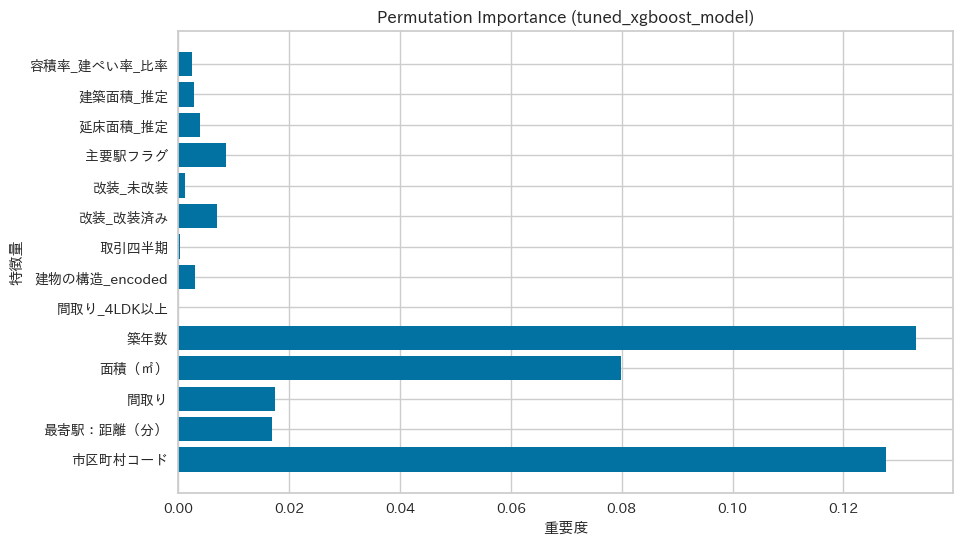

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import japanize_matplotlib

# PyCaretで学習したモデルを取得
final_model = finalize_model(tuned_xgboost_model)  # finalize_model() で最終的なモデルを取得

# 学習に使用したデータを取得
X = get_config('X_train')  # PyCaretのsetupで作成された学習データを取得
y = get_config('y_train')  # PyCaretのsetupで作成されたターゲット変数を取得

# permutation_importance を計算
result = permutation_importance(final_model, X, y,
                                scoring='neg_mean_absolute_error',
                                n_repeats=30, random_state=123)

# 結果を可視化
importances = result.importances_mean
feature_names = X.columns

# 日本語フォントを設定
plt.rcParams['font.family'] = 'IPAexGothic'
japanize_matplotlib.japanize()

# 横棒グラフで重要度を可視化
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('重要度')
plt.ylabel('特徴量')
plt.title('Permutation Importance (tuned_xgboost_model)')
plt.show()

延床面積_推定と建築面積_推定を入れると精度が下がったため、カラムを削除する

In [ ]:
# 延床面積_推定と建築面積_推定のカラムを削除
train_subset = train_subset.drop(['延床面積_推定', '建築面積_推定'], axis=1)
test_df = test_df.drop(['延床面積_推定', '建築面積_推定'], axis=1)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

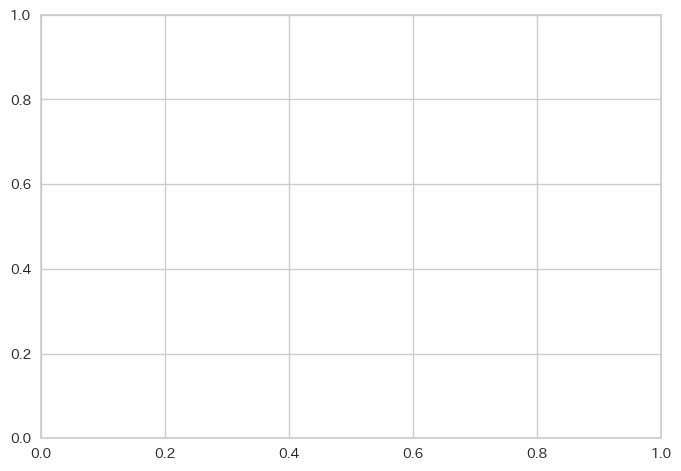

In [ ]:
# Pycaretでxgboostのモデルを使用し、精度検証を行う。
from pycaret.regression import *

s = setup(data=train_subset,
             target='取引価格（総額）_log',
             ignore_features=['取引年'],  # 取引年は無視
             session_id=123)  # 乱数シードを固定

xgboost_model = create_model('xgboost')

tuned_xgboost_model = tune_model(xgboost_model, optimize='MAE')

evaluate_model(tuned_xgboost_model)

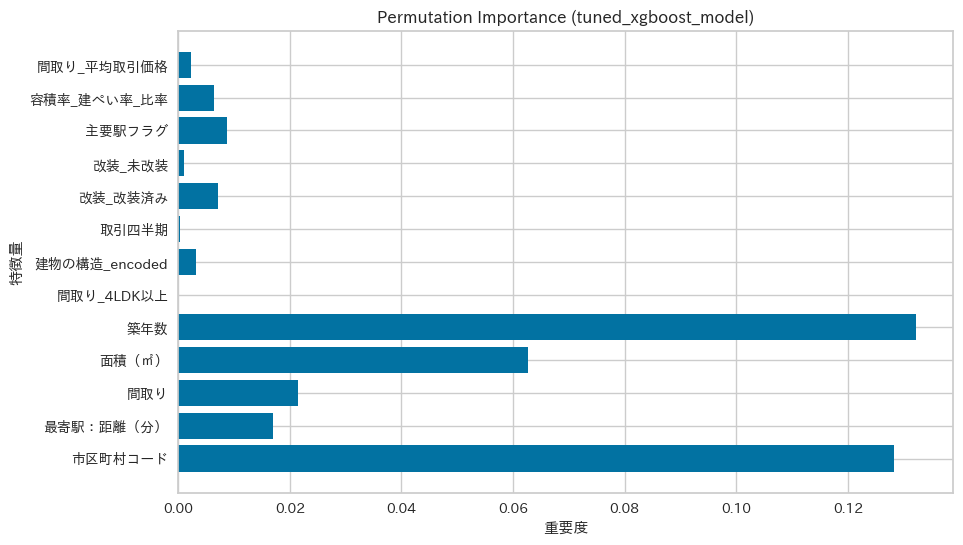

In [ ]:
from pycaret.regression import *
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import japanize_matplotlib

# finalize_model()で最終的なモデルを取得
final_model = finalize_model(tuned_xgboost_model)

X = get_config('X_train')  # PyCaretのsetupで作成された学習データを取得
y = get_config('y_train')  # PyCaretのsetupで作成されたターゲット変数を取得

result = permutation_importance(final_model, X, y,
                                scoring='neg_mean_absolute_error',
                                n_repeats=30, random_state=123)

importances = result.importances_mean
feature_names = X.columns

# 日本語フォントを設定
plt.rcParams['font.family'] = 'IPAexGothic'
japanize_matplotlib.japanize()

# 横棒グラフで重要度を可視化
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('重要度')
plt.ylabel('特徴量')
plt.title('Permutation Importance (tuned_xgboost_model)')
plt.show()